In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.stats import pearsonr
from scipy.fftpack import fft,fftfreq,ifft
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot

In [2]:
df1 = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/yanran data/yanran_heavy1_blink.csv',sep = '\t')
df2 = pd.read_csv('/Users/yanran/Documents/Brainco_eyeblink/yanran data/yiquan_heavy_blink.csv',sep = '\t')

In [3]:
ls_yanran_heavy1_blink = []
for i in range(0,len(df1)):
    data= df1['data'][i].split(',')
    lst = data[1:79]
    ls_yanran_heavy1_blink += map(float,lst)
arr_yanran_heavy1_blink = np.array(ls_yanran_heavy1_blink)

ls_yiquan_heavy_blink = []
for i in range(0,len(df2)):
    data= df2['data'][i].split(',')
    lst = data[1:79]
    ls_yiquan_heavy_blink += map(float,lst)
arr_yiquan_heavy_blink = np.array(ls_yiquan_heavy_blink)

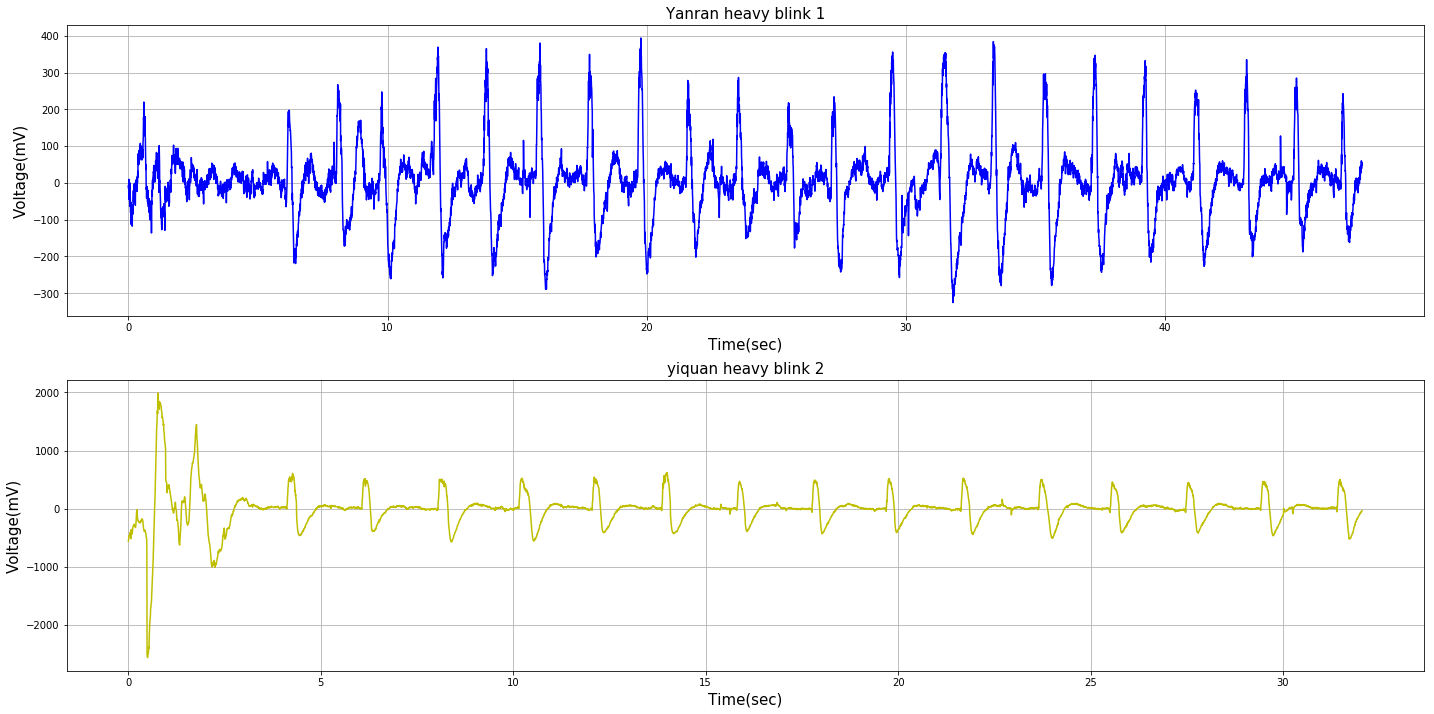

In [4]:
x1 = np.linspace(0,len(arr_yanran_heavy1_blink)/160.6, len(arr_yanran_heavy1_blink))
x2 = np.linspace(0,len(arr_yiquan_heavy_blink)/160.6,len(arr_yiquan_heavy_blink))
y1 = arr_yanran_heavy1_blink
y2 = arr_yiquan_heavy_blink
fig,(ax1,ax2) = plt.subplots(2,figsize = [20,10])

ax1.set_xlabel('Time(sec)',fontsize = 15)
ax1.set_ylabel('Voltage(mV)',fontsize = 15)
ax1.set_title('Yanran heavy blink 1',fontsize = 15)
ax1.grid()
ax1.plot(x1,y1,'b')

ax2.set_xlabel('Time(sec)',fontsize = 15)
ax2.set_ylabel('Voltage(mV)',fontsize = 15)
ax2.set_title('yiquan heavy blink 2',fontsize = 15)
ax2.grid()
ax2.plot(x2,y2,'y')
fig.tight_layout(pad = 1)

Peaks 

[  96  994 1297 1439 1570 1879 1917 2218 2448 2550 2857 3175 3466 3621
 3780 4090 4372 4735 5059 5359 5496 5681 5990 6300 6612 6928 7138 7237
 7525] 

 X value : 

[ 0.59783662  6.19009996  8.07702178  8.96132177  9.77711966 11.70140626
 11.93804992 13.81251681 15.24483371 15.88003511 17.79186679 19.77220058
 21.58439282 22.54964986 23.53981675 25.47033082 27.22647588 29.48704559
 31.50474416 33.37298359 34.22614626 35.37822724 37.30251385 39.23302792
 41.17599692 43.14387578 44.45164338 45.06816239 46.86167224] 

Y value : 

[219.789505   197.32443492 266.97572072 170.29158274 247.3526001
 112.69410451 369.23217773 365.14472961 115.52588145 380.35583496
 349.64879354 394.00068919 278.61309052 118.67205302 286.73171997
 217.81508128 234.1448466  355.92238108 353.92634074 384.3647639
 109.57272847 296.85878754 347.0732371  332.66894023 252.31011709
 335.18854777 127.56411235 285.08249919 242.59281158]
Peaks 

[ 188  508  842 1144 1447 1750 2064 2375 2683 2846 3010 3305 3623 3939

Text(0.5,1,'Find all peaks')

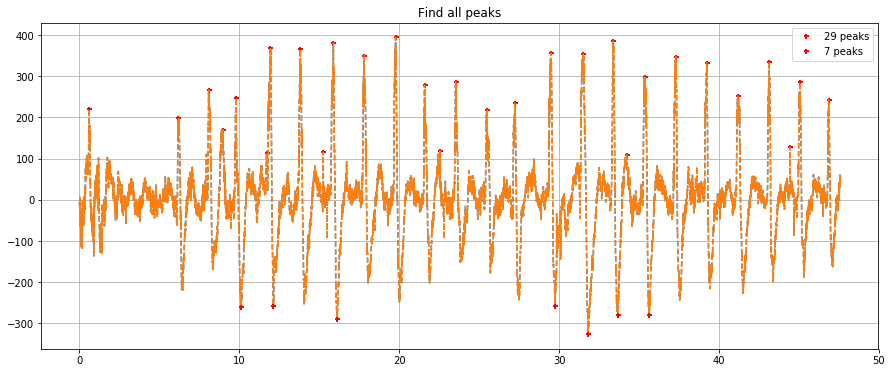

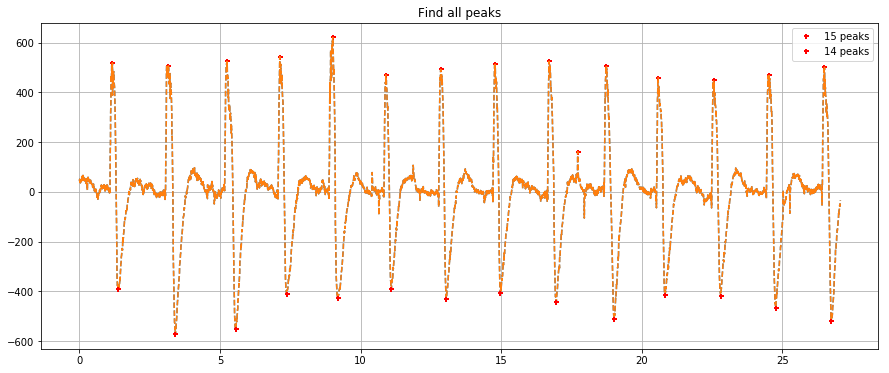

In [5]:
y1 = arr_yanran_heavy1_blink
x1 = np.linspace(0,len(arr_yanran_heavy1_blink)/160.6,len(arr_yanran_heavy1_blink))
indexes1 = peakutils.indexes(y1,thres=0.6, min_dist=30)
indexes2 = peakutils.indexes(-y1,thres=0.9, min_dist=30)
print 'Peaks','\n\n', indexes1,'\n\n',' X value :', '\n\n',x1[indexes1],'\n\n','Y value :', '\n\n', y1[indexes1]
pyplot.figure(figsize=(15,6))
pplot(x1, y1, indexes1)
pplot(x1, y1, indexes2)
plt.grid()
pyplot.title('Find all peaks')


y2 = arr_yiquan_heavy_blink[800:]
x2 = np.linspace(0,len(arr_yiquan_heavy_blink[800:])/160.6,len(arr_yiquan_heavy_blink[800:]))
indexes1 = peakutils.indexes(y2,thres=0.6, min_dist=30)
indexes2 = peakutils.indexes(-y2,thres=0.8, min_dist=30)
print 'Peaks','\n\n', indexes1,'\n\n',' X value :', '\n\n',x2[indexes1],'\n\n','Y value :', '\n\n', y2[indexes1]
pyplot.figure(figsize=(15,6))
pplot(x2, y2, indexes1)
pplot(x2, y2, indexes2)
plt.grid()
pyplot.title('Find all peaks')

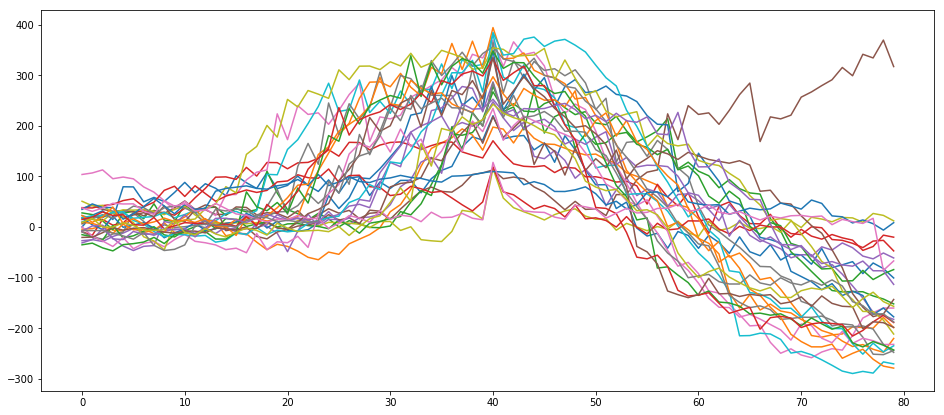

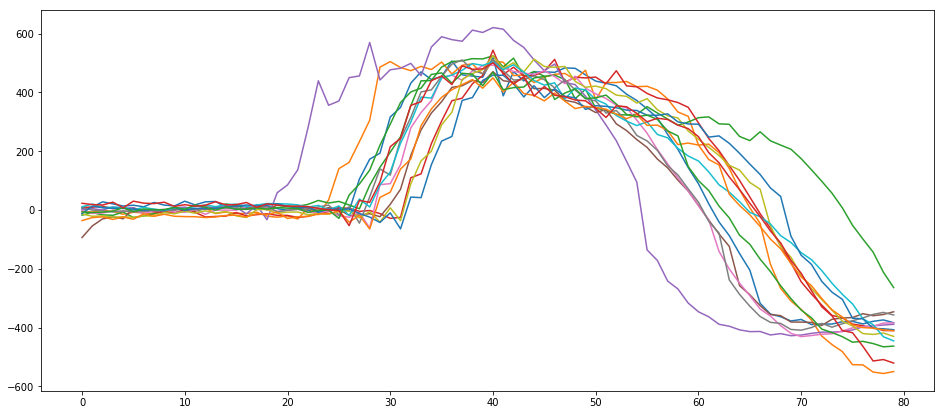

In [6]:
fig= plt.figure(figsize=(16,7))
indexes1 = peakutils.indexes(y1,thres=0.6, min_dist=30)
#indexes2 = peakutils.indexes(-y1,thres=0.9, min_dist=30)
new_arr1 = np.empty([len(indexes1),80])
for i in range(0,len(indexes1)):
    new_arr1[i] = y1[int(indexes1[i]-0.25*160):int(indexes1[i]+0.25*160)]
for i in range(0,len(new_arr1)):
        plt.plot(new_arr1[i])
        
        
fig= plt.figure(figsize=(16,7))
indexes2 = peakutils.indexes(y2,thres=0.7, min_dist=30)
#indexes4 = peakutils.indexes(-y2,thres=0.8, min_dist=30)
new_arr2 = np.empty([len(indexes2),80])
for i in range(0,len(indexes2)):
    new_arr2[i] = y2[int(indexes2[i]-0.25*160):int(indexes2[i]+0.25*160)]
for i in range(0,len(new_arr2)):
        plt.plot(new_arr2[i])      

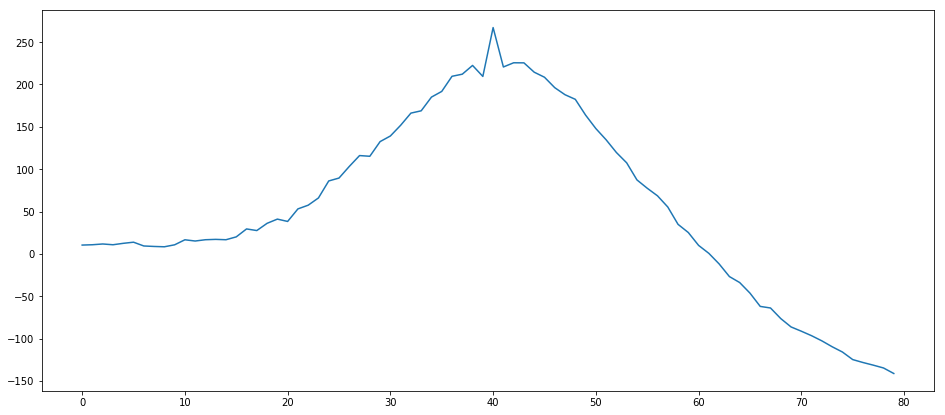

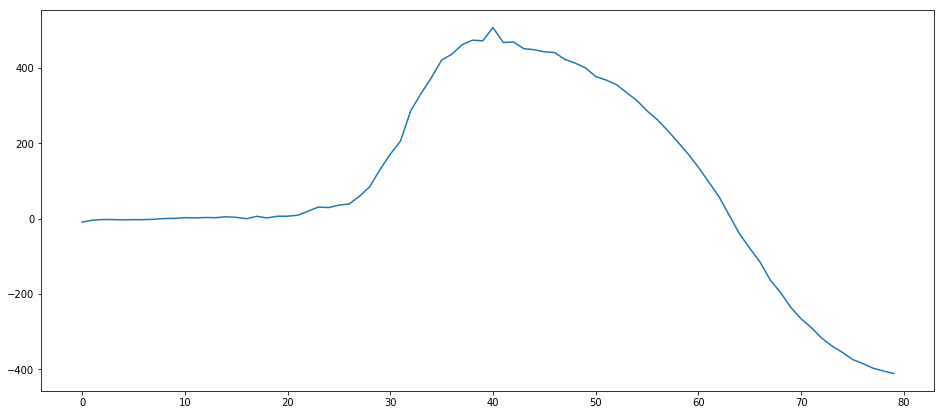

In [7]:
fig = plt.figure(figsize = (16,7))
mean_arr1 = new_arr1.mean(axis=0)
plt.plot(mean_arr1)


fig = plt.figure(figsize = (16,7))
mean_arr2 = new_arr2.mean(axis=0)
plt.plot(mean_arr2)

In [8]:
new_arr2

array([[   5.29066722,   10.05840302,   27.81263987, ..., -378.6799113 ,
        -373.97797902, -383.51949056],
       [  -4.91809845,   -6.71386719,   -0.99913279, ..., -551.33851369,
        -556.23118083, -549.71313477],
       [ -17.34161377,   -8.74678294,  -16.59552256, ..., -143.23965708,
        -211.64353689, -263.99930318],
       ...,
       [ -36.00692749,  -25.8102417 ,  -23.31670125, ..., -401.90601349,
        -407.71261851, -410.65788269],
       [  -6.9621404 ,   -8.58529409,   -7.2406133 , ..., -454.36827342,
        -465.45283   , -462.98217773],
       [  22.9473114 ,   18.56168111,   17.07585653, ..., -513.69063059,
        -508.72993469, -520.66357931]])

In [9]:
mean_arr2

array([-9.40064022e+00, -4.29541724e+00, -2.69701367e+00, -2.76640483e+00,
       -3.41771898e+00, -2.94446945e+00, -2.95659474e+00, -1.99245271e+00,
        1.02815174e-01,  4.58921705e-01,  2.36304601e+00,  1.71781722e+00,
        2.71352132e+00,  2.25834619e+00,  4.70990226e+00,  3.23845091e+00,
       -4.47818211e-01,  5.94954264e+00,  1.60950706e+00,  6.10971451e+00,
        6.20290211e+00,  8.90298117e+00,  1.95141974e+01,  3.04939860e+01,
        2.91434243e+01,  3.57115155e+01,  3.85952677e+01,  5.90596426e+01,
        8.43277886e+01,  1.29995142e+02,  1.70716535e+02,  2.05900328e+02,
        2.86607583e+02,  3.32077730e+02,  3.73803729e+02,  4.20723802e+02,
        4.36386086e+02,  4.61740221e+02,  4.73563058e+02,  4.71849237e+02,
        5.07072176e+02,  4.67628729e+02,  4.68698819e+02,  4.51035341e+02,
        4.48358513e+02,  4.42650977e+02,  4.40791970e+02,  4.22481264e+02,
        4.12802401e+02,  4.00031430e+02,  3.77238410e+02,  3.67787883e+02,
        3.55919225e+02,  

In [11]:
from math import sqrt
#def pearson(T2): 
train_data = mean_arr2
# # real_time_data = [-347.98526764, -375.22919973, -356.32419586, -345.4284668 ,
#        -366.07138316, -319.71391042, -326.75425212, -297.2758611 ,
#        -262.42033641, -287.45301565, -232.33159383, -202.86973317,
#        -208.6725235 , -135.50345103, -151.57922109,  -95.06257375,
#        -117.93867747, -137.25439707, -142.92367299,  -66.68758392,
#         -25.22818247,  194.82453664,  273.01915487,  451.48436228,
#         635.55304209,  842.61830648, 1067.99093882, 1312.04032898,
#        1659.96106466, 2172.52318064, 2535.20361582, 2666.66634878,
#        2666.66634878, 2666.66634878, 2666.66634878, 2666.66634878,
#        2666.66634878, 2666.66634878, 2666.66634878, 2666.66634878,
#        2666.66634878, 2666.66634878, 2666.66634878, 2666.66634878,
#        2666.66634878, 2666.66634878, 2666.66634878, 2666.66634878,
#        2666.66634878, 2666.66634878, 2666.66634878, 2566.79026286,
#        2403.9885203 , 2359.09398397, 2260.38869222, 2170.72264353,
#        2057.69125621, 1944.59120433, 1864.99786377, 1805.61510722,
#        1674.55037435, 1552.37738291, 1452.03272502, 1266.85142517,
#        1173.09029897, 1060.77671051,  868.3942159 ,  765.84688822,
#         601.01572673,  464.28457896,  395.42738597,  224.44883982,
#         162.56809235,   94.07011668,   76.82991028,   65.83340963,
#         -75.34853617, -102.48915354, -148.59644572, -252.65789032]

r1 = np.zeros((len(new_arr2)))

for i in range(0,len(new_arr2)):

    real_time_data = new_arr2[i]

    sum_train = sum(train_data)

    sum_real_time = sum(real_time_data)

    count = len(train_data)

    sqSum_train = sum(pow(num,2) for num in train_data)

    sqSum_real_time = sum(pow(num,2) for num in real_time_data)

    mulSum = sum(train_data[i]*real_time_data[i] for i in range(count))

    mot = sqrt( (sqSum_train-pow(sum_train,2)/count)*(sqSum_real_time-pow(sum_real_time,2)/count))

    son = mulSum-sum_train*sum_real_time/count

    r = son/mot
    
    r1[i] = r

mean_r = np.sum(r1)/len(r1)

std = np.std(r1)

final_r = mean_r-1.96*std

In [12]:
mean_r

0.9430686063625501

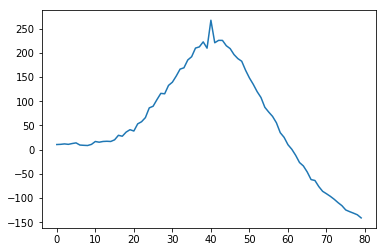

In [13]:
plt.plot(mean_arr1)

In [14]:
# plt.plot(arr_yanran_heavy1_blink[910:990])

In [15]:
arr_yanran_heavy1_blink[910:990]

array([ 39.88742828,  27.67181396,  24.92237091,  36.62776947,
        30.26040395,  38.2343928 ,  37.46827443,  34.4136556 ,
        39.16009267,  19.78047689,  20.26335398,  35.05802155,
        23.77446493,  17.60927836,  20.15463511,  23.76588186,
        20.80663045,  -2.60130564,   2.37560272,  27.69978841,
         3.27269236,  16.09961192,  15.46637217,  15.4244105 ,
        14.04412587,  11.7260615 ,   8.13738505,  -0.19105275,
         2.75580088,  -8.5401535 ,  -6.71482086, -19.42666372,
       -18.99623871, -11.90121969, -26.35637919, -11.71112061,
        -6.56827291, -40.3248469 , -31.79359436, -27.80119578,
       -18.6662674 ,   8.04233551, -11.55694326, -21.8407313 ,
        -4.48417664,  -3.40016683,   2.18741099,  -6.21128082,
        -8.19301605,   5.59997559, -11.10426585,  -6.35274251,
         8.04615021, -10.87411245, -11.90757751, -13.64707947,
        -6.0895284 ,   9.94936625, -17.56922404, -12.71311442,
       -13.56601715, -30.09192149, -45.01883189, -34.42

In [12]:
mean_arr2

array([   64.54313066,    56.17633396,    54.19038137,    59.77278815,
          44.69608731,    45.52932315,    53.25777266,    41.81132846,
          50.91376834,    61.97162204,    56.6479577 ,    86.40189701,
         110.2543513 ,   133.77861447,   200.20580292,   222.16207716,
         250.44875675,   263.08396657,   293.79942152,   340.9509235 ,
         418.4929106 ,   486.79521349,   615.38624234,   759.81296963,
         934.29266612,  1130.98159366,  1359.28830041,  1586.93555196,
        1815.60219659,  2015.78093635,  2191.27907223,  2328.29110887,
        2451.8629498 ,  2512.00252109,  2577.50053406,  2598.21196662,
        2634.22730764,  2637.69363827,  2647.15105693,  2644.88533868,
        2655.57518005,  2653.42797173,  2621.07863956,  2603.93979814,
        2571.77800073,  2522.8779051 ,  2511.07870738,  2441.71596103,
        2347.19568888,  2290.55610233,  2187.20548418,  2048.61263699,
        1854.45062849,  1660.00881195,  1464.13052877,  1249.45996602,
      

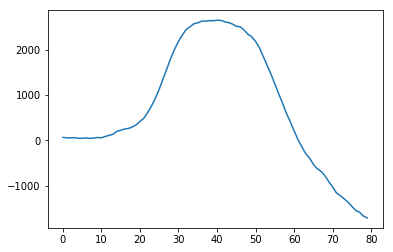

In [13]:
plt.plot(mean_arr2)

In [159]:
x = mean_arr1
y = new_arr1[1]
scipy.stats.pearsonr(x, y)

(0.8442390563463024, 7.918249335139451e-23)